In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
color = sns.color_palette()
from sklearn.ensemble import RandomForestRegressor
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
import pandas_profiling as pp

In [2]:
df = pd.read_json("data/train.json")
df.head(2)

bathrooms  bedrooms                       building_id              created  \
4        1.0         1  8579a0b0d54db803821a35a4a615e97a  2016-06-16 05:55:27   
6        1.0         2  b8e75fc949a6cd8225b455648a951712  2016-06-01 05:44:33   

                                         description      display_address  \
4  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   

                                            features  latitude  listing_id  \
4  [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6  [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   

   longitude                        manager_id  \
4   -73.9539  a10db4590843d78c784171a107bdacb4   
6   -73.9722  955db33477af4f40004820b4aed804a0   

                                              photos  price  \
4  [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6  [https://photos.renthop.com/2/7092344_7663c19a...   3800   

        street_address interest_level  
4  145 Borinquen Place         medium  
6        230 East 44th            low

In [3]:
np.random.seed(123)
df = df.sample(frac=1) # shuffle data
df_dev, df_test = train_test_split(df, test_size=0.15)
df_train, df_valid = train_test_split(df_dev, test_size=0.15)

In [4]:
print("df Rows : ", df.shape)
print("df_dev Rows : ", df_dev.shape)
print("df_test Rows : ", df_test.shape)
print("df_train Rows : ", df_train.shape)
print("df_valid Rows : ", df_valid.shape)

df Rows :  (49352, 15)
df_dev Rows :  (41949, 15)
df_test Rows :  (7403, 15)
df_train Rows :  (35656, 15)
df_valid Rows :  (6293, 15)


In [5]:
df.describe()

bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 34100 to 39514
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [8]:
df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [9]:
df.dtypes.value_counts()

object     9
int64      3
float64    3
dtype: int64

In [10]:
# 313 0.0
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: bathrooms, dtype: int64

In [11]:
print(df.bathrooms.median(),df.bathrooms.mean(), df.bathrooms.mode())

1.0 1.2121798508672395 0    1.0
dtype: float64


In [12]:
df.bathrooms.replace(0, df.bathrooms.median())

34100     1.0
45041     2.0
94327     1.0
114382    1.0
88517     2.0
         ... 
19664     1.0
38657     2.0
44635     1.0
70524     2.0
39514     1.0
Name: bathrooms, Length: 49352, dtype: float64

In [13]:
# 0 9475
df.bedrooms.value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [14]:
print(df.bedrooms.median(),df.bedrooms.mean(), df.bedrooms.mode())

1.0 1.5416396498622142 0    1
dtype: int64


In [15]:
df.bedrooms.replace(0, df.bedrooms.median())

34100     2
45041     2
94327     1
114382    1
88517     3
         ..
19664     1
38657     2
44635     1
70524     2
39514     1
Name: bedrooms, Length: 49352, dtype: int64

In [16]:
# 0 9475
df.features.value_counts()

[]                                                                                                                3218
[Pre-War, Dogs Allowed, Cats Allowed]                                                                             1400
[Cats Allowed, Dogs Allowed]                                                                                      1080
[Hardwood Floors]                                                                                                 1050
[Pre-War]                                                                                                          937
                                                                                                                  ... 
[Hardwood Floors, High Ceiling, Light]                                                                               1
[Loft, Laundry in Unit, Hardwood Floors, Cats Allowed, Dogs Allowed, Multi-Level, Dishwasher]                        1
[** EXQUISITE RIVERSIDE SPECIAL! * STUNNING STUD

In [17]:
#
df.latitude.value_counts()

40.7530    300
40.7568    298
40.7301    246
40.7074    244
40.7073    236
          ... 
40.8529      1
40.6511      1
40.8489      1
40.6287      1
40.8769      1
Name: latitude, Length: 2335, dtype: int64

In [17]:
type(df.building_id)

pandas.core.series.Series

In [18]:
#  0 8286
df.building_id.value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
c8a1f3fefa093254299108da6757f68e       1
e85a4841bbd71ad014999dbee6deed73       1
be4d9d78910c9151f0d3513832a69a1e       1
4bf1bc5fe65d9ab9a86d71941c23a472       1
316a3fc51cb6c69bfed5dd8a2cf561c3       1
Name: building_id, Length: 7585, dtype: int64

In [22]:
# 
df.listing_id.value_counts()

6819838    1
7201974    1
6939926    1
7142677    1
7140628    1
          ..
7096956    1
6976123    1
7119167    1
6908536    1
7143424    1
Name: listing_id, Length: 49352, dtype: int64

In [24]:
df.description.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1647
                                                                                                                                      

In [20]:
df['log price'] = (df['price']+1).transform(np.log)
df_2 = np.expm1(df['log price'])

In [22]:
df_2

34100     4890.0
45041     4195.0
94327     2549.0
114382    2995.0
88517     6250.0
           ...  
19664     4308.0
38657     3095.0
44635     2900.0
70524     8429.0
39514     2350.0
Name: log price, Length: 49352, dtype: float64

In [66]:
pp.ProfileReport(df)

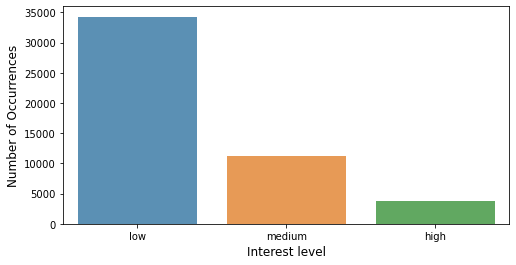

In [10]:
int_level = df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

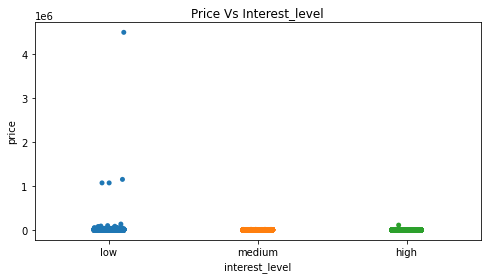

In [11]:
plt.figure(figsize=(8,4))
order = ['low', 'medium', 'high']
sns.stripplot(df["interest_level"], df["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

# Transform price

In [30]:
def plot_3_graph(df, feature):
    '''Create three (histogram, probability and box plot) graphs to analyze target (price).
    requirements: Importing seaborn, matplotlab and scipy modules'''

    # Set style
    style.use('fivethirtyeight')

    # Creating a customized chart. and giving in figsize 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    
    # creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    # Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title. 
    ax1.set_title('Histogram')
    # plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title. 
    ax2.set_title('QQ_plot')
    # Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    # Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title. 
    ax3.set_title('Box Plot')
    # Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

In [31]:
def plot_3_graph_log(df, feature):
    '''Create three (histogram, probability and box plot) graphs to analyze target (price). 
    requirements: Importing seaborn, matplotlab and scipy modules'''

    # Set style
    style.use('fivethirtyeight')

    # Creating a customized chart. and giving in figsize 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    
    # creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    # Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title. 
    ax1.set_title('Histogram')
    # plot the histogram. 
    sns.distplot(np.log(df.loc[:,feature], norm_hist=True, ax = ax1))

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title. 
    ax2.set_title('QQ_plot')
    # Plotting the QQ_Plot. 
    stats.probplot(np.log(df.loc[:,feature], plot = ax2))

    # Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title. 
    ax3.set_title('Box Plot')
    # Plotting the box plot. 
    sns.boxplot(np.log(df.loc[:,feature], orient='v', ax = ax3));

In [43]:
def plotting_3_chart_log(df, feature):
    # Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(np.log(df.loc[:,feature]), norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(np.log(df.loc[:,feature]), plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

In [40]:
price = df['price']
print(df.price.describe())

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64


In [14]:
# median and mean seem very small in constrast to max
print(df['price'].max(), df['price'].mean(), df['price'].median(), df['price'].min())

4490000 3830.174035500081 3150.0 43


In [53]:
# 100_000 
df["price"].sort_values()

53144          43
87511          45
117339        401
113552        695
85617         695
           ...   
123877     135000
57803     1070000
55437     1070000
12168     1150000
32611     4490000
Name: price, Length: 49352, dtype: int64

In [114]:
def sub_3_graph(df, feature):
    log_df= np.log(df.loc[:,feature])
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(20,10))
    # Set the title. 
    ax1.set_title('Charts without log')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    
    # Set the title. 
    ax2.set_title('Charts with log')
    sns.distplot(log_df, norm_hist=True, ax = ax2)
 
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3);
    
    ## Plotting the box plot. 
    sns.boxplot(log_df, orient='v', ax = ax4);

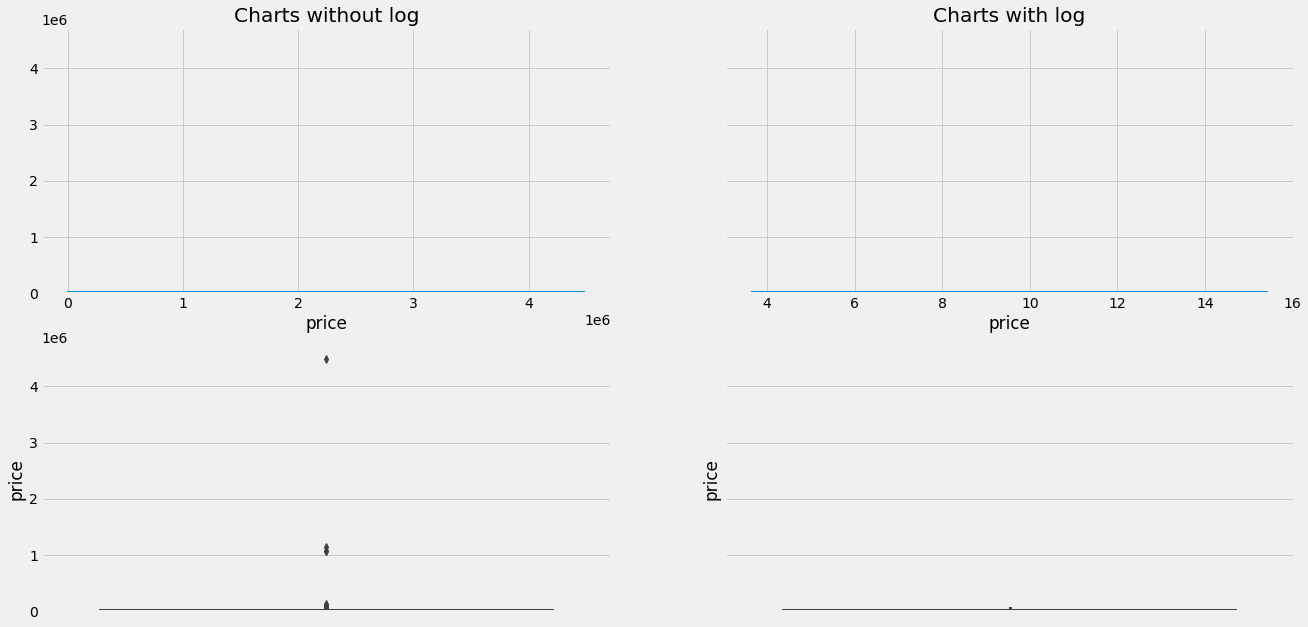

In [115]:
sub_3_graph(df, "price")

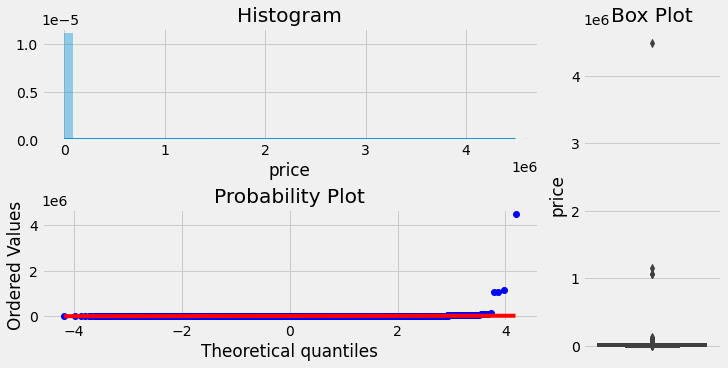

In [32]:
plot_3_graph(df, 'price')

In [24]:
plot_3_chart_log(df, 'price')

NameError: name 'plot_3_chart_log' is not defined

In [54]:
# df2 = df[(df["price"] >= 100) & df["price"] <= 100_000]
df1 = df[(df["price"] >= 100)]
df2 = df1[(df1["price"] <= 1000_000)]
df2.shape

(49346, 15)

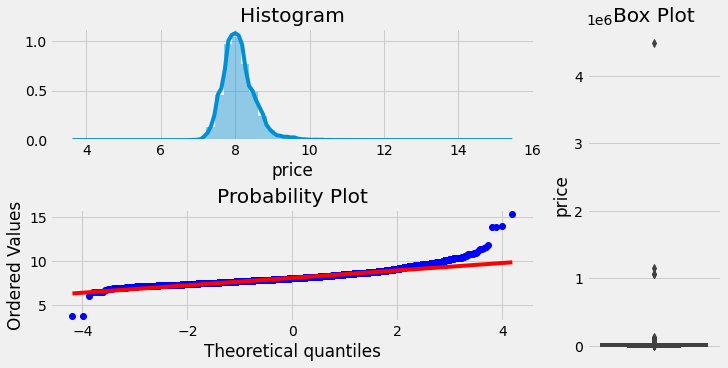

In [57]:
plotting_3_chart_log(df, 'price')

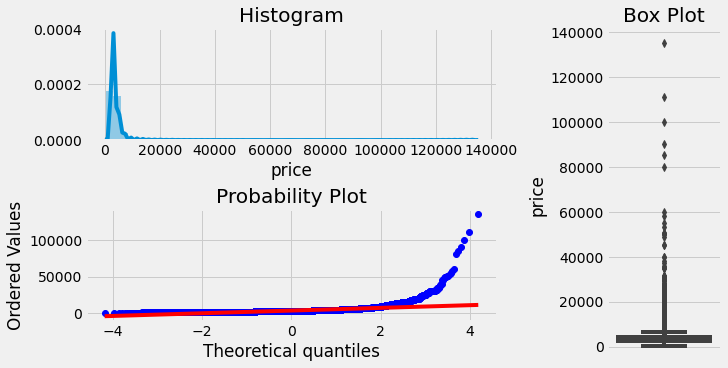

In [58]:
plotting_3_chart(df2, 'price')

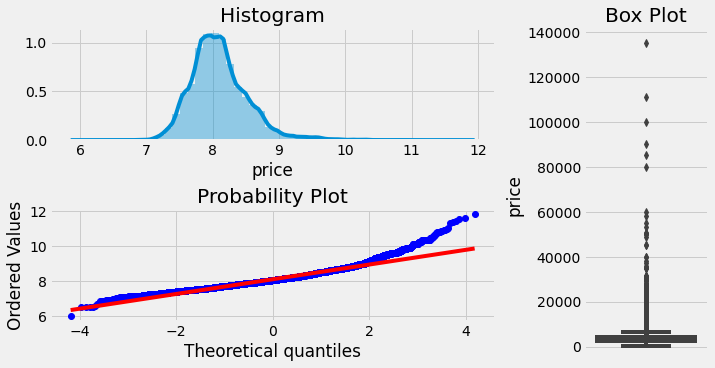

In [59]:
plotting_3_chart_log(df2, 'price')

In [67]:
# df2 = df[(df["price"] >= 100) & df["price"] <= 100_000]
df3 = df[(df["price"] <= 150_000)]
df3.shape

(49348, 15)

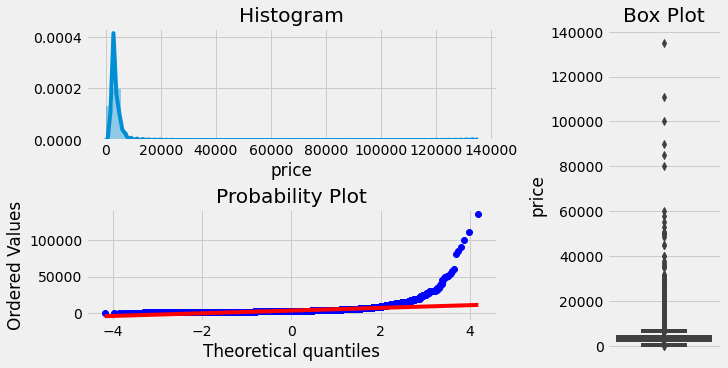

In [68]:
plotting_3_chart(df3, 'price')

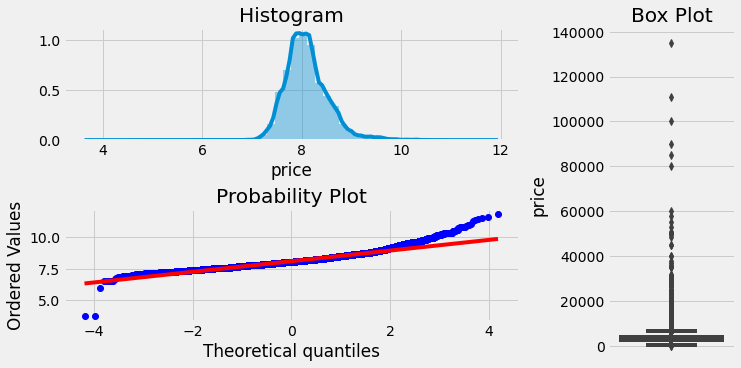

In [69]:
plotting_3_chart_log(df3, 'price')

In [ ]:
# generate random variables

s_size = 100000 # sample size

rv_std_norm = np.random.normal(size=s_size) # standard normal
rv_norm = np.random.normal(loc=1, scale=2.5, size=s_size) # normal
rv_skew_norm = scs.skewnorm.rvs(a=5, size=s_size) # skew normal

In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
import probscale

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('PP-plots', fontsize=22)

sm.ProbPlot(rv_norm, scs.norm, loc=0, scale=1).ppplot(line='45', ax=ax[0])
ax[0].set_title('Statsmodels', fontsize=16)

pp_plot(rv_norm, scs.norm(loc=0, scale=1), ax=ax[1])
ax[1].set_title('pp_plot', fontsize=16)

plt.show()

In [ ]:
df_small_rent = df[(df["price"] <= 1000)]
df_small_rent.shape

In [ ]:
df_small_rent.head()

In [ ]:
# is sthg 44_900_000$ and 11_500_000$ for rent even possible??
df_huge_rent = df[(df["price"] >= 100_000)]
df_huge_rent.shape

In [ ]:
df_huge_rent.head(10)

In [ ]:
price = df2['price']

print(df.price.describe())

plt.figure(figsize=(20,5))
sns.distplot(price)
plt.ylabel('Prob', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Visuallizing Interest Level Vs Bathroom

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(13,8)

sns.countplot(x="bathrooms", data=df,ax=ax1)
data1 = df.groupby(['bathrooms', 'interest_level'])['bathrooms'].count().unstack('interest_level').fillna(0)
data1[['low','medium',"high"]].plot(kind='bar', stacked=True,ax=ax2)